**Iris Flower Classification Project**



**Introduction**

The classification of iris flowers into species (Setosa, Versicolor, Virginica) based on sepal and petal measurements is a classic supervised learning problem. This notebook demonstrates:



*  Data pipeline implementation
*  Machine Learning classification model(s)


*   Model evaluation metrics
*   Effective data visualizations


*   Real-world insights


**Dataset**: UCI Iris dataset (available in sklearn)

**Problem Statement**

Manually identifying flower species is slow and error-prone. By training a machine learning model, we can:


*   Automate species identification
*   Increase speed and accuracy



*  Reduce the need for expert intervention





**Goal**: Classify iris flowers into the correct species based on Sepal Length, Sepal Width, Petal Length, Petal Width.


**Import all Libraries**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

**Data Loading & Initial Exploration**

In [18]:
iris_data = load_iris(as_frame=True)
df = iris_data.frame

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Data Cleaning & Pipeline Setup**

In [19]:
print("Null values:\n", df.isnull().sum())

df.drop_duplicates(inplace=True)

X = df.drop("target", axis=1)
y = df["target"]

Null values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


The dataset is clean, containing no missing values or duplicates. We separate the features and target variable for modelling.

**Exploratory Data Analysis (EDA) & Visualizations**

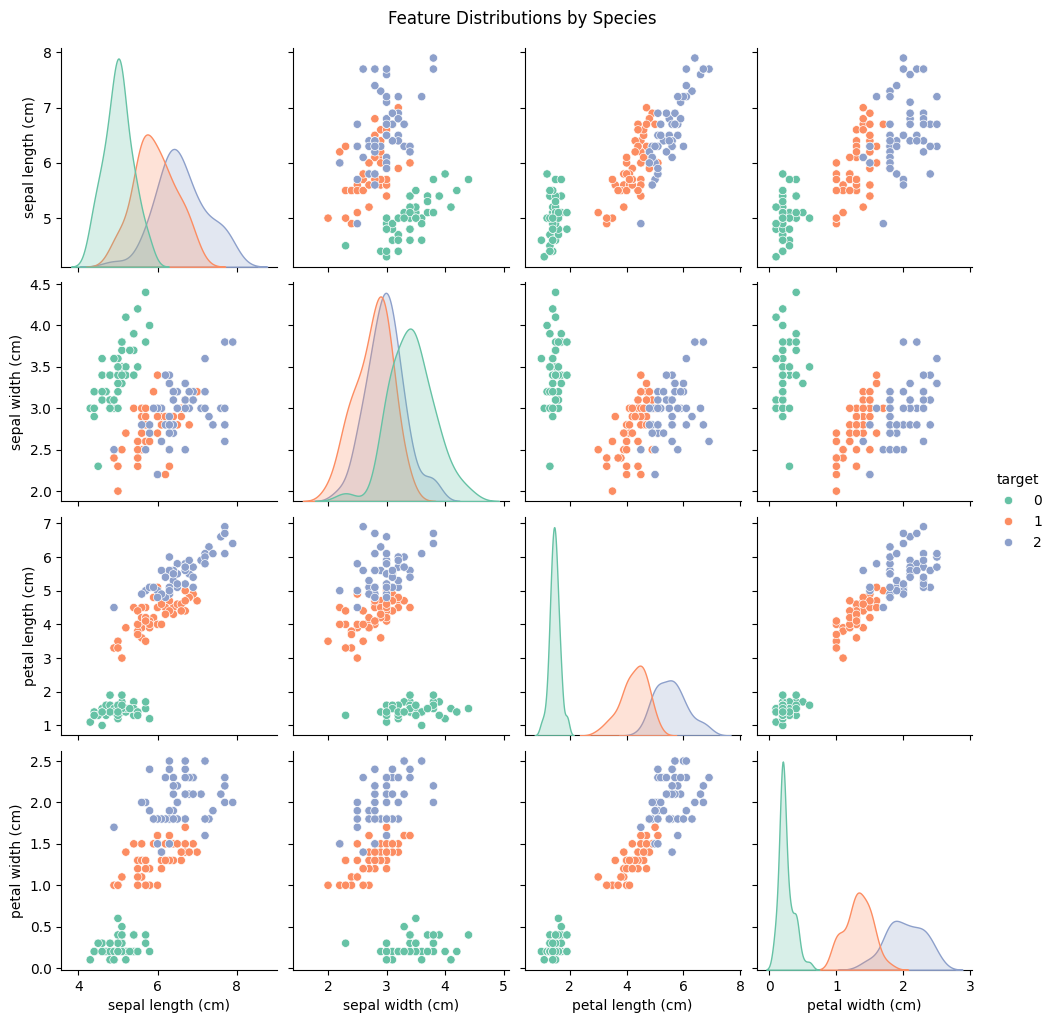

In [20]:
sns.pairplot(df, hue="target", palette="Set2",
             vars=iris_raw.feature_names)
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.show()

**Train–Test Split**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Model Training (Decision Tree & Logistic Regression for comparison)

In [22]:
log_tree = DecisionTreeClassifier(random_state=42)
log_tree.fit(X_train, y_train)


reg_lr = LogisticRegression(max_iter=200)
reg_lr.fit(X_train, y_train)

LogisticRegression(max_iter=200)

We train two models to demonstrate versatility:

*   Decision Tree (interpretable, rule-based)
*  Logistic Regression (linear decision boundaries)



**Model Evalution**

--- Decision Tree ---
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



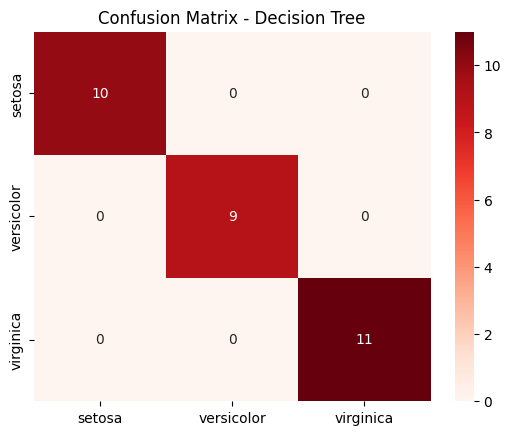

--- Logistic Regression ---
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



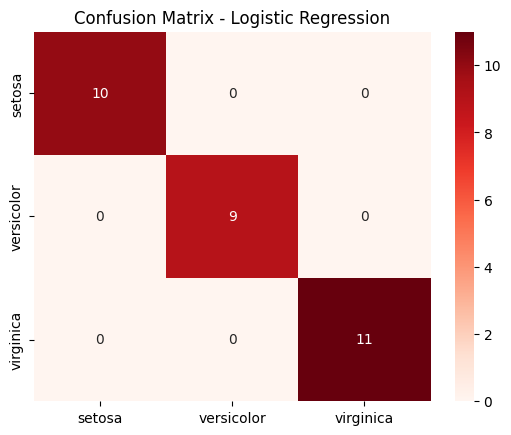

In [24]:
def evaluate_model(model, name):
  y_pred = model.predict(X_test)
  print(f"--- {name} ---")
  print("Accuracy:", accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred, target_names=iris_raw.target_names))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
              xticklabels=iris_data.target_names,
              yticklabels=iris_data.target_names)
  plt.title(f"Confusion Matrix - {name}")
  plt.show()
evaluate_model(log_tree, "Decision Tree")
evaluate_model(reg_lr, "Logistic Regression")

**Decision Tree Visualization**

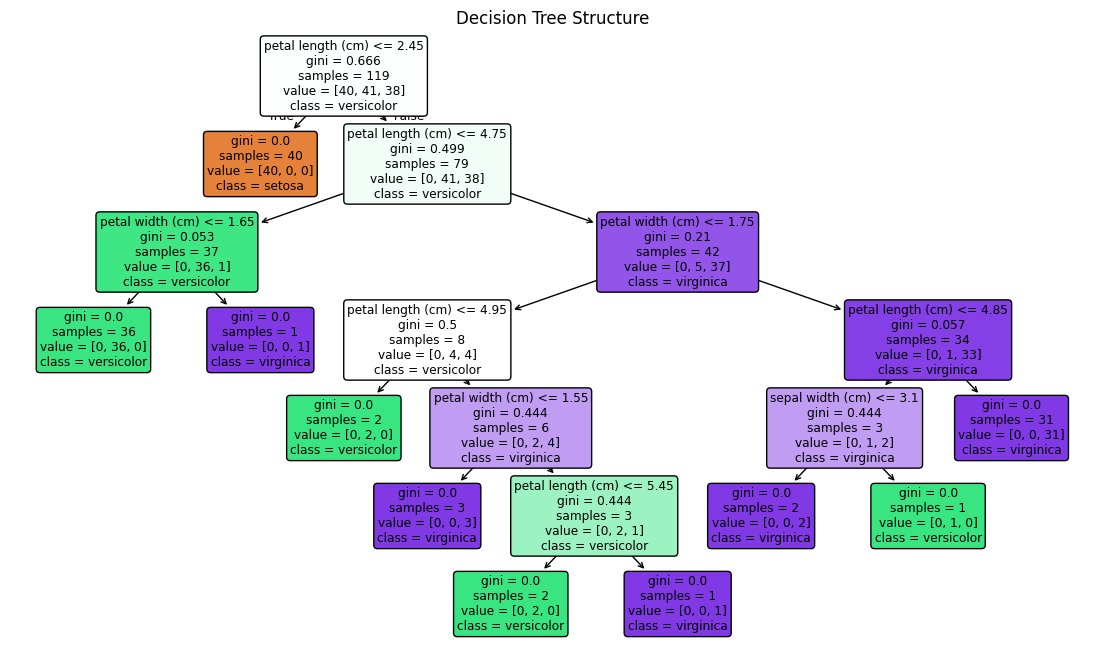

In [13]:
plt.figure(figsize=(14,8))
plot_tree(log_tree, feature_names=X.columns,
          class_names=iris_data.target_names,
          filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()


**Prediction for New Data**

In [25]:
new_sample = [[5.0, 3.4, 1.5, 0.2]]
prediction = log_tree.predict(new_sample)
print("Predicted species:", iris_data.target_names[prediction[0]])


Predicted species: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
joblib.dump(log_tree, "iris_decision_tree.joblib")
loaded_model = joblib.load("iris_decision_tree.joblib")

**Real-world Implications**

Automating iris flower classification can:

*   Reduce errors in botanical identification

*   Aid in rapid sorting for research or commercial purposes
*   Serve as a teaching example in machine learning education

This methodology can be extended to classify other plants, agricultural products, or similar items using measurable features.



In [27]:

#Real-World Insights & Example Prediction

# Example prediction using Decision Tree
example = [[5.0, 3.4, 1.5, 0.2]]  # Sepal length, Sepal width, Petal length, Petal width
pred_species = log_tree.predict(example)[0]
print(f"Example Input {example} → Predicted Species: {iris_data.target_names[pred_species]}")

# Real-world applications of Iris Flower Classification
print("\n   Real-World Applications   ")
print("""
1.  Agriculture & Horticulture:
   - Helps farmers and gardeners identify flower species quickly.
   - Useful in breeding programs to select specific traits.

2.  Botanical Research:
   - Speeds up plant taxonomy and classification for researchers.
   - Supports conservation efforts by quickly identifying endangered species.

3.  Mobile & AI-powered Tools:
   - Can be integrated into plant-identification mobile apps.
   - Enables hobbyists and educators to recognize plants in the field without expert knowledge.

4.  Automation in Greenhouses:
   - Automated monitoring systems can detect plant species and adjust care routines.
""")


Example Input [[5.0, 3.4, 1.5, 0.2]] → Predicted Species: setosa

   Real-World Applications   

1.  Agriculture & Horticulture:
   - Helps farmers and gardeners identify flower species quickly.
   - Useful in breeding programs to select specific traits.

2.  Botanical Research:
   - Speeds up plant taxonomy and classification for researchers.
   - Supports conservation efforts by quickly identifying endangered species.

3.  Mobile & AI-powered Tools:
   - Can be integrated into plant-identification mobile apps.
   - Enables hobbyists and educators to recognize plants in the field without expert knowledge.

4.  Automation in Greenhouses:
   - Automated monitoring systems can detect plant species and adjust care routines.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



**Geospatial Mapping**

Geospatial mapping is *not applicable* for this dataset, as it contains only morphological measurements and no location data.


**Conclusion & Future Work**

**Conclusion**




*   The Decision Tree model achieved high accuracy on the test set.
*   Logistic Regression also performed well, demonstrating separability of classes.

*   Visualization reveals clear separation in feature space.






**Future Work**



*   Test on a larger floral dataset.

*   Deploy as a web app for real-time predictions.

*  Integrate edge device deployment for field use.



